In [35]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
msft = yf.Ticker("MSFT") #get microsoft as trial
hist = msft.history(period = '5y', interval = '1d') #5 year data with 1 day as the interval
df = pd.DataFrame(hist) #make a dataframe for further process
df['Date'] = df.index
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
Date,,,,,,,,
2016-07-21,51.572027,51.802342,51.369349,51.406200,32776700,0.0,0,2016-07-21
2016-07-22,51.664163,52.170854,51.387783,52.115578,32157200,0.0,0,2016-07-22
2016-07-25,52.023441,52.272181,51.829974,52.262966,25610600,0.0,0,2016-07-25
2016-07-26,52.069507,52.778877,52.060293,52.290607,28079000,0.0,0,2016-07-26
2016-07-27,52.152422,52.327459,51.691793,51.765491,32327500,0.0,0,2016-07-27


### Simple Moving Average 

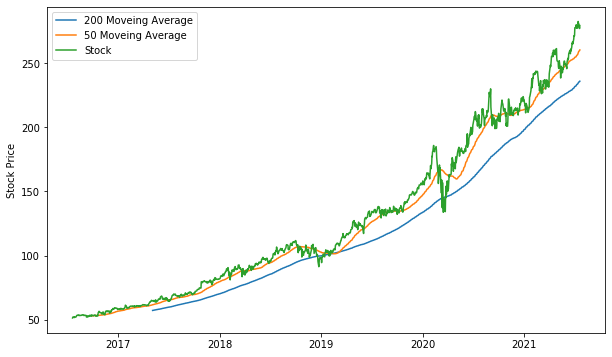

In [54]:
sma200 = df['Close'].rolling(200).mean() #200
sma50 = df['Close'].rolling(50).mean() #50
close = df['Close'] #real stock data of 1 day as the interval
plt.figure(figsize=(10,6))
plt.plot(sma200, label='200 Moveing Average') #plot
plt.plot(sma50, label='50 Moveing Average')
plt.plot(close, label='Stock')
plt.ylabel('Stock Price', fontsize=10)
plt.legend() #print label
plt.show()

### Cumulative Moving Average 

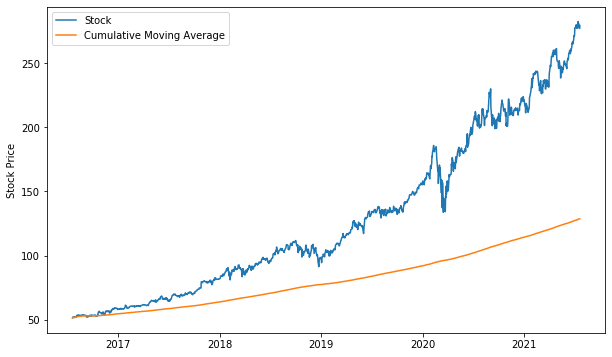

In [55]:
cma200 = df['Close'].expanding().mean()
plt.figure(figsize=(10,6))
plt.plot(close, label='Stock')
plt.plot(cma200, label='Cumulative Moving Average')
plt.ylabel('Stock Price', fontsize=10)
plt.legend()
plt.show()

### Exponential Moving Average 

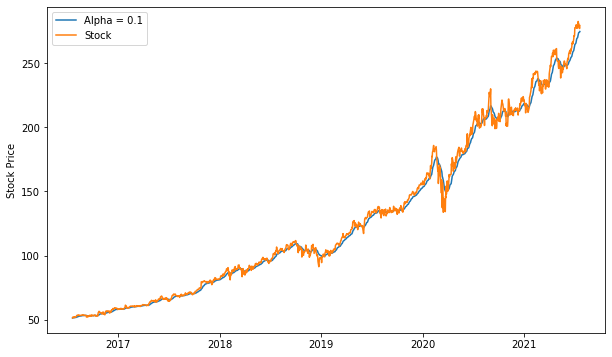

In [56]:
alpha = 0.1
plt.figure(figsize=(10,6))
plt.plot(df['Close'].ewm(alpha=alpha, adjust=False).mean(),label='Alpha = 0.1')
plt.plot(close,label='Stock')
plt.legend(fontsize=10)
plt.ylabel('Stock Price', fontsize=10)
plt.show()

Text(0, 0.5, 'Weights')

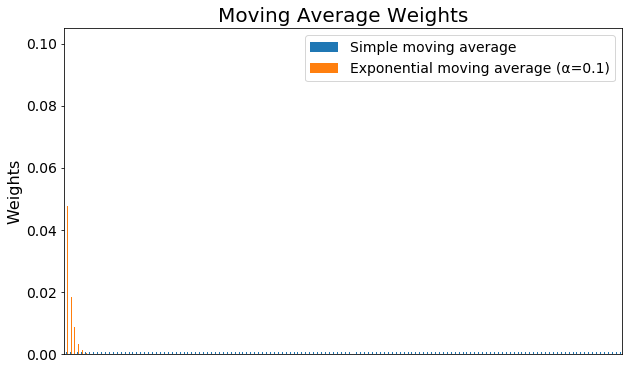

In [57]:
ALPHA = alpha
N = len(df['Close'])
w_sma = np.repeat(1/N, N)

#weights - exp_moving_average, alpha=0.05 adjust=False
w_ema = [(1-ALPHA)**i if i==N-1 else ALPHA*(1-ALPHA)**i for i in range(N)]
pd.DataFrame({'w_sma': w_sma, 'w_ema': w_ema}).plot(kind='bar', figsize=(10,6)) #contract another dataframe
plt.xticks([])
plt.yticks(fontsize=14)
plt.legend(labels=['Simple moving average', 'Exponential moving average (α=0.1)'], fontsize=14)

# title and labels
plt.title('Moving Average Weights', fontsize=20)
plt.ylabel('Weights', fontsize=16)